In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import ssl
ssl._create_default_https_context=ssl._create_unverified_context

In [81]:
# 데이터 불러오기
data = pd.read_csv('power2.csv', index_col=0, parse_dates=True)

In [82]:
# 데이터 전처리
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]
train = train.resample('1S').mean()
test = test.resample('1S').mean()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


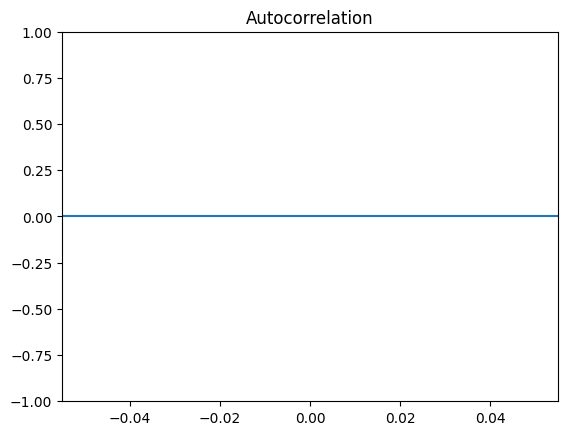

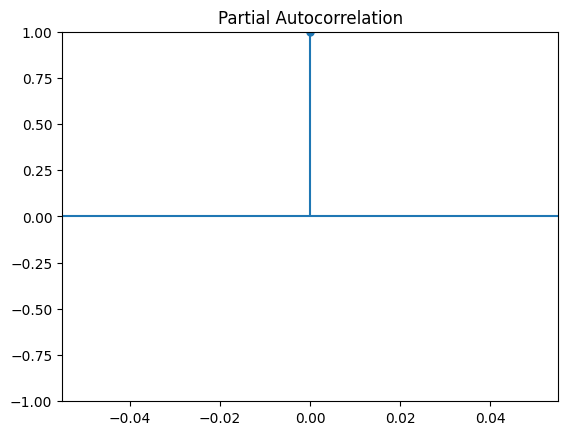

In [83]:
# ACF와 PACF 그래프 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train)
plot_pacf(train)
plt.show()

In [84]:
# 모델 파라미터 찾기
import itertools

p_range = range(0, 3)
d_range = range(0, 3)
q_range = range(0, 3)
pdq = list(itertools.product(p_range, d_range, q_range))

best_pdq = (0, 0, 0)
best_aic = np.inf

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

print('Best ARIMA parameter:', best_pdq)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starti

Best ARIMA parameter: (2, 0, 1)


In [87]:
# 모델 학습 및 예측
model = ARIMA(train, order=best_pdq)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))[0]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


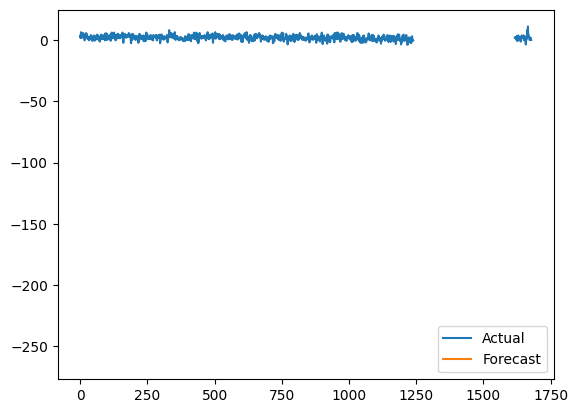

In [88]:
# 결과 시각화
plt.plot(test.values, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()